In [108]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import skimage as io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [109]:
path_dir = "C:\\Users\\home\Downloads\\archive(6)\\train"
# data_dir = tf.keras.utils.get_file('')

In [110]:
import pathlib
data_dir = pathlib.Path(path_dir)
data_dir

WindowsPath('C:/Users/home/Downloads/archive(6)/train')

In [111]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_0.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_1.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_10.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_100.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_101.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_102.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_103.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_104.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_105.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_106.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_107.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_108.jpg'),
 WindowsPath('C:/Users/home/Downloads/archive(6)/train/Closed/_109.jpg'),
 WindowsPath('C:/Users/home/Downloads/archi

In [149]:
len(list(data_dir.glob('*/*.jpg')))

1452

In [186]:
eye = list(data_dir.glob('Open/*'))

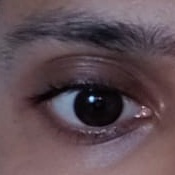

In [187]:
PIL.Image.open(eye[0])

In [188]:
eye_images_dict={
    'Closed':list(data_dir.glob('Closed/*')),
    'Open':list(data_dir.glob('Open/*')),
}

eye_labels_dict={
    'Closed':0,
    'Open':1,
}
eye_labels={
    0:'Closed',
    1:'Open',
}

In [196]:
image = cv2.imread(str(eye_images_dict['Open'][0]))

In [197]:
image.shape


(175, 175, 3)

In [198]:
X,Y=[],[]
for eye_name , images in eye_images_dict.items():
    for image in images:
        image = cv2.imread(str(image))
        image = cv2.resize(image,(180,180))
        X.append(image)
        Y.append(eye_labels_dict[eye_name])

In [199]:
type(X[0])

numpy.ndarray

In [200]:
X = np.array(X)
Y = np.array(Y)

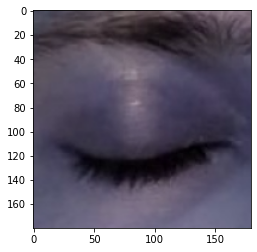

In [201]:
plt.imshow(X[0])

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [204]:
len(X_train)

1089

In [205]:
len(X_test)

363

In [206]:
X_train_set = X_train/255
X_test_set = X_test/255

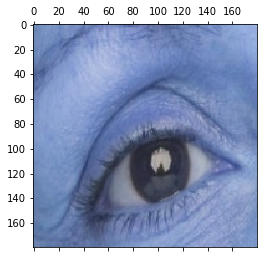

In [207]:
plt.matshow(X_test_set[47])

In [166]:
model = Sequential([
    #convalotional layers 
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    # Deep neural layers /Dense layers of 128 perseptron
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(2)
])

In [167]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [168]:
model.fit(X_train_set,Y_train,epochs=4)

Epoch 1/4
35/35 [==============================] - 29s 802ms/step - loss: 0.4585 - accuracy: 0.7952
Epoch 2/4
35/35 [==============================] - 28s 795ms/step - loss: 0.1743 - accuracy: 0.9366
Epoch 3/4
35/35 [==============================] - 28s 808ms/step - loss: 0.1304 - accuracy: 0.9495
Epoch 4/4
35/35 [==============================] - 28s 790ms/step - loss: 0.1245 - accuracy: 0.9532


In [169]:
model.evaluate(X_test_set,Y_test)

12/12 [==============================] - 3s 233ms/step - loss: 0.1161 - accuracy: 0.9504


[0.11613582074642181, 0.9504132270812988]

In [178]:
#myimage = list(data_dir.glob('Open\__49.jpg'))
image = cv2.imread(r'C:\Users\home\Downloads\archive(6)\train\\Closed\_15.jpg')
image = cv2.resize(image,(180,180))

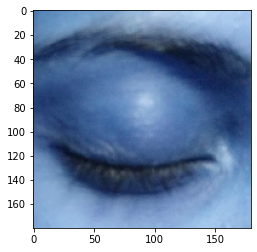

In [179]:
plt.imshow(image)

In [180]:
data = np.expand_dims(image, 0)

In [181]:
data.shape

(1, 180, 180, 3)

In [182]:
predictions = model.predict(data)
predictions

array([[ 856.17004, -743.57855]], dtype=float32)

In [183]:
eye_labels[np.argmax(predictions)]

'Closed'

In [176]:
model.save("model1")

INFO:tensorflow:Assets written to: model1\assets


In [177]:
econstructed_model = keras.models.load_model("model1")

In [143]:
econstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)            